In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [4]:
df1=pd.read_csv(r"D:\project 5\sensor_data (1).csv")
df1.head()

,Timestamp,Boiler Name,Temperature,Anomaly
0,2023-01-23 00:58:20,Boiler A,20.180428,0
1,2023-01-30 06:30:08,Boiler A,23.372948,0
2,2023-01-03 10:47:23,Boiler A,29.858208,0
3,2023-01-03 17:10:50,Boiler C,20.564032,0
4,2023-01-04 17:50:22,Boiler D,23.547024,0


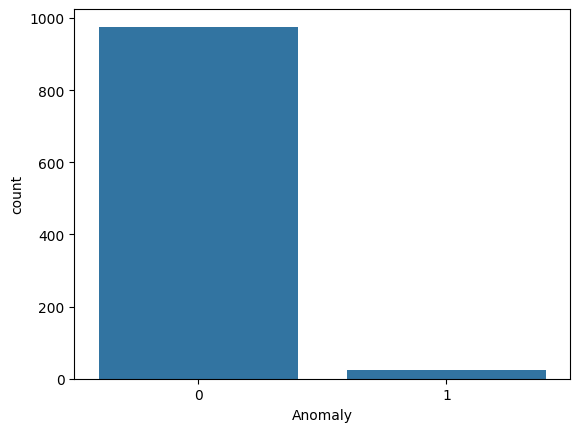

In [5]:
ax=sns.countplot(x='Anomaly',data=df1)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    1000 non-null   object 
 1   Boiler Name  1000 non-null   object 
 2   Temperature  1000 non-null   float64
 3   Anomaly      1000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


<Figure size 1500x600 with 0 Axes>

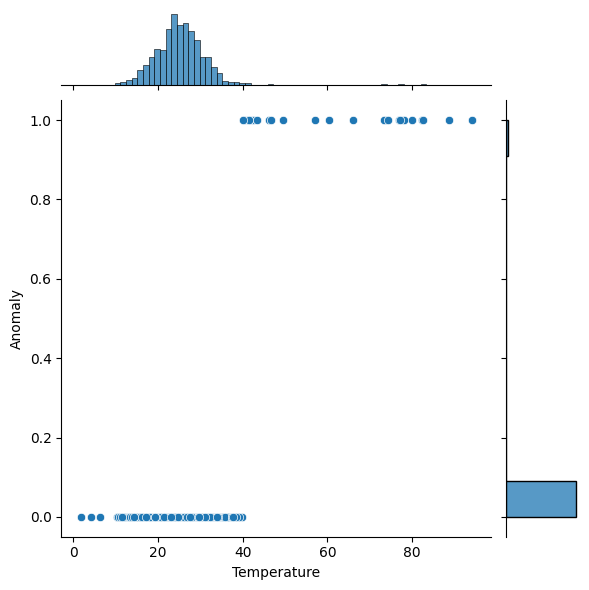

In [12]:
plt.figure(figsize=(15,6))
sns.jointplot(x=df1["Temperature"],y=df1["Anomaly"])
plt.show()

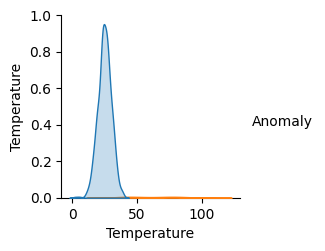

In [13]:
sns.pairplot(df1,hue="Anomaly")

<Axes: ylabel='Anomaly'>

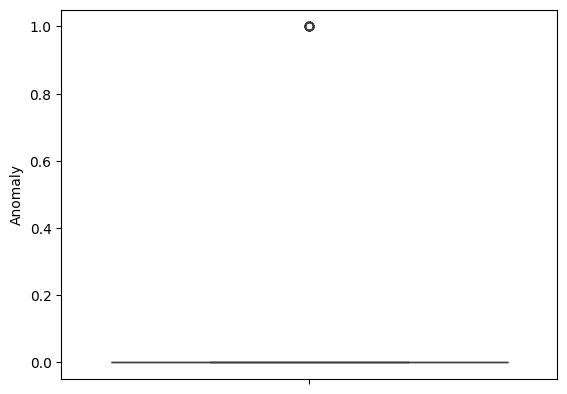

In [14]:
sns.boxplot(df1["Anomaly"])

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    1000 non-null   object 
 1   Boiler Name  1000 non-null   object 
 2   Temperature  1000 non-null   float64
 3   Anomaly      1000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [16]:
df1.head()

,Timestamp,Boiler Name,Temperature,Anomaly
0,2023-01-23 00:58:20,Boiler A,20.180428,0
1,2023-01-30 06:30:08,Boiler A,23.372948,0
2,2023-01-03 10:47:23,Boiler A,29.858208,0
3,2023-01-03 17:10:50,Boiler C,20.564032,0
4,2023-01-04 17:50:22,Boiler D,23.547024,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [18]:
df1['Timestamp']=pd.to_datetime(df1['Timestamp'])
label_encoder=LabelEncoder()
df1['Boiler Name']=label_encoder.fit_transform(df['Boiler Name'])

df1['hour']=df1['Timestamp'].dt.hour
df1['day_of_week']=df1['Timestamp'].dt.dayofweek

X=df1[['Temperature','hour','day_of_week','Boiler Name']]
y=df1['Anomaly']



In [19]:
df1.head()

,Timestamp,Boiler Name,Temperature,Anomaly,hour,day_of_week
0,2023-01-23 00:58:20,0,20.180428,0,0,0
1,2023-01-30 06:30:08,0,23.372948,0,6,0
2,2023-01-03 10:47:23,0,29.858208,0,10,1
3,2023-01-03 17:10:50,2,20.564032,0,17,1
4,2023-01-04 17:50:22,3,23.547024,0,17,2


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    1000 non-null   datetime64[ns]
 1   Boiler Name  1000 non-null   int32         
 2   Temperature  1000 non-null   float64       
 3   Anomaly      1000 non-null   int64         
 4   hour         1000 non-null   int32         
 5   day_of_week  1000 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1)
memory usage: 35.3 KB


In [21]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [22]:
y.value_counts()

Anomaly
0    976
1     24
Name: count, dtype: int64

In [23]:
y_resampled.value_counts()

Anomaly
0    976
1    976
Name: count, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

[[328   0]
 [  0 317]]
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       317

    accuracy                           1.00       645
   macro avg       1.00      1.00      1.00       645
weighted avg       1.00      1.00      1.00       645

---------------------------


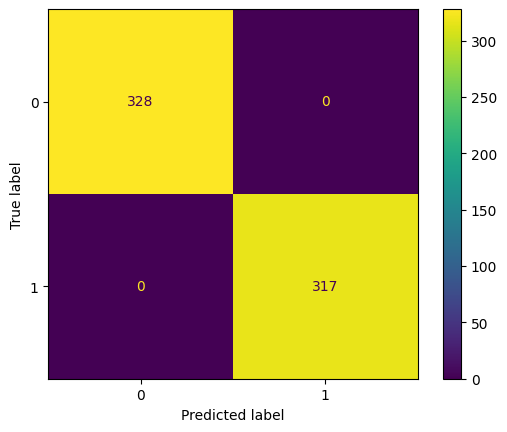

In [30]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('--------------------------')
print(classification_report(y_test,y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

[[328   0]
 [  0 317]]
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       317

    accuracy                           1.00       645
   macro avg       1.00      1.00      1.00       645
weighted avg       1.00      1.00      1.00       645

---------------------------


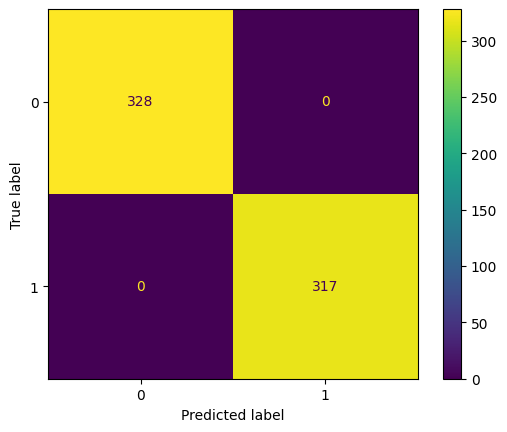

In [31]:
# create model instance
bst = XGBClassifier()
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

print(confusion_matrix(y_test,preds))
print('--------------------------')
print(classification_report(y_test,preds))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,preds)
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[[198   1]
 [  0   1]]
--------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       199
           1       0.50      1.00      0.67         1

    accuracy                           0.99       200
   macro avg       0.75      1.00      0.83       200
weighted avg       1.00      0.99      1.00       200

---------------------------


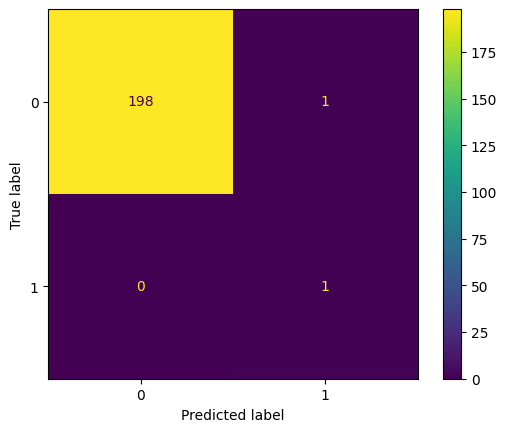

In [33]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('--------------------------')
print(classification_report(y_test,y_pred))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

[[199   0]
 [  0   1]]
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00         1

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

---------------------------


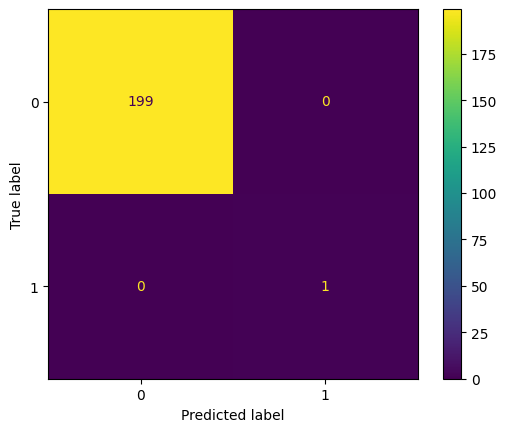

In [34]:
# create model instance
bst = XGBClassifier()
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

print(confusion_matrix(y_test,preds))
print('--------------------------')
print(classification_report(y_test,preds))
print('---------------------------')
ConfusionMatrixDisplay.from_predictions(y_test,preds)
plt.show()

In [35]:
import time

import numpy as np

start_time = time.time()
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.008 seconds


In [36]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [37]:
len(X.columns)

4

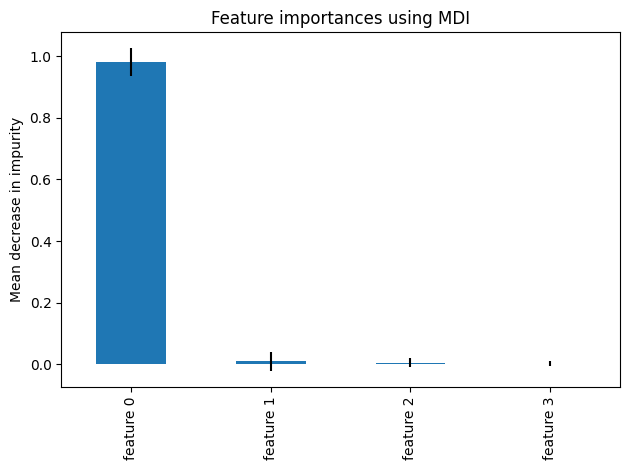

In [38]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [40]:
X.columns

Index(['Temperature', 'hour', 'day_of_week', 'Boiler Name'], dtype='object')

<Axes: >

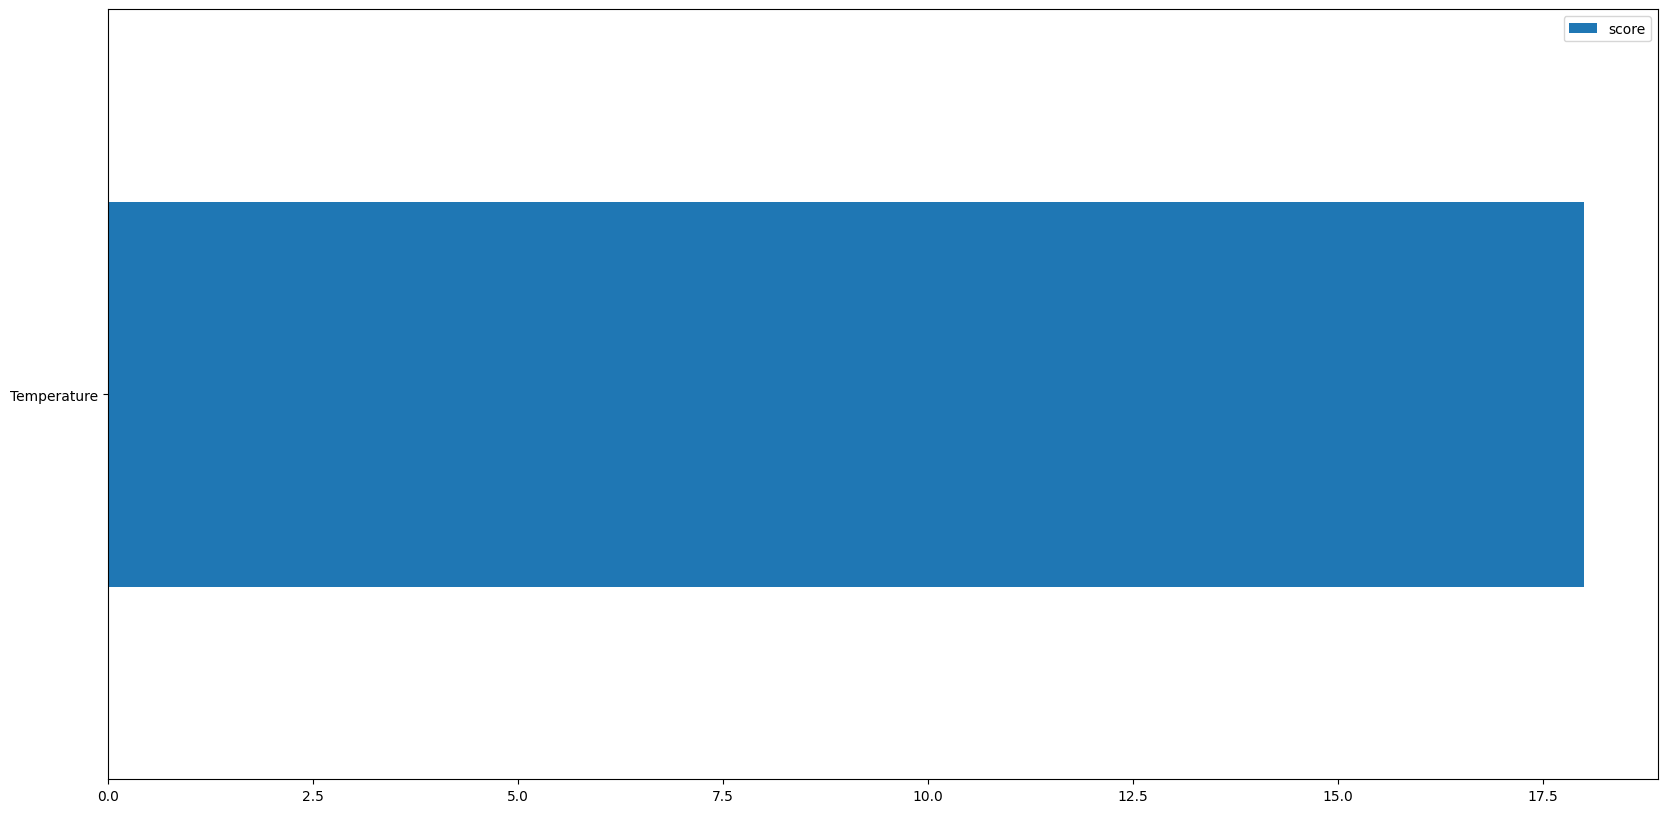

In [39]:
feature_important = bst.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features